In [90]:
# import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, k_means
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

In [108]:
from sklearn.preprocessing import LabelEncoder 

df = pd.read_csv('/Users/jakirice/Desktop/Mall_Customers.csv')

df['Age'] = df['Age'].apply(lambda Age: 'Young' if Age <= 25 else 'Adult' if Age >40 else 'Young Adult' )
df['Annual Income'] = df['Annual Income'].apply(lambda AnnualIncome: 'Low' if AnnualIncome <= 25 else 'Above Average' if AnnualIncome >40 else 'Average' )
df['Spending Score'] = df['Spending Score'].apply(lambda SpendingScore: 'Low Score' if SpendingScore <= 25 else 'High Score' if SpendingScore >40 else 'Fair' )

le = LabelEncoder()
gender = le.fit_transform(df['Gender'])
age = le.fit_transform(df['Age'])
income = le.fit_transform(df['Annual Income'])
score = le.fit_transform(df['Spending Score'])
df['Gender'] = gender
df['Age'] = age
df['Annual Income'] = income
df['Spending Score'] = score
df


,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,1,1,2,0
1,2,1,1,2,1
2,3,0,1,2,2
3,4,0,1,2,1
4,5,0,2,2,0
...,...,...,...,...,...
195,196,0,2,0,1
196,197,0,0,0,0
197,198,1,2,0,1
198,199,1,2,0,2


In [109]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

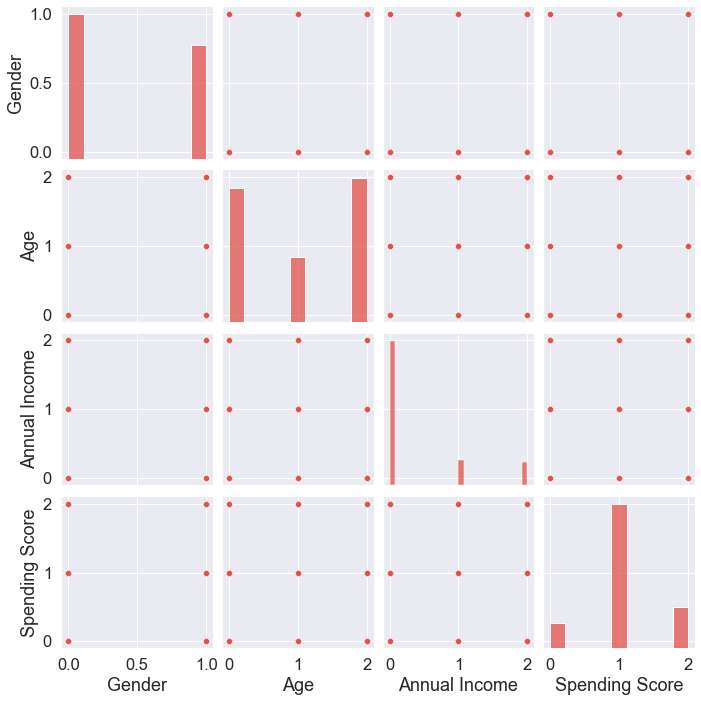

In [110]:
sns.pairplot(df[['Gender','Age','Annual Income','Spending Score']])

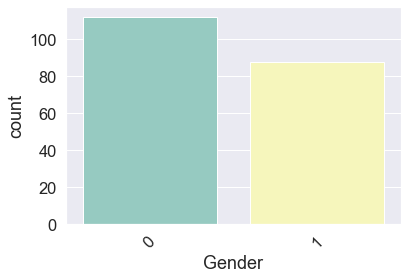

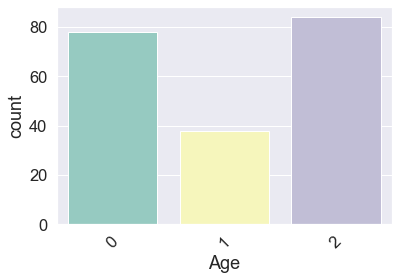

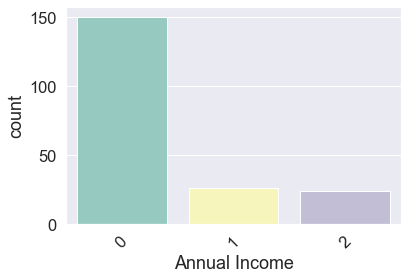

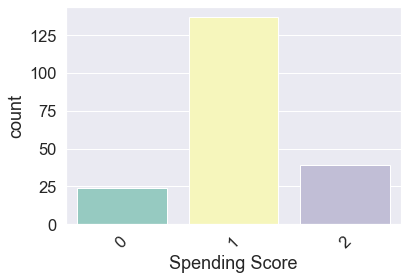

In [111]:
#identifying features/ attributes for clustering
features = ['Gender', 'Age', 'Annual Income', 'Spending Score'] #exclude CustomerID
#plotting count of records and features to visualize data
# to check if some features can be joined to reduce feature dimension
for f in features:
    sns.countplot(x = f, data = df, palette = 'Set3')# hue = 'Good Loan')
    plt.xticks(rotation=45)
    plt.show()

In [112]:
print(df.shape)
# keep the columns needed
raw_data = df[features]
print(raw_data.shape)

(200, 5)
(200, 4)


In [113]:
x = pd.get_dummies(raw_data, columns = features)
print(x.shape)

(200, 11)


In [114]:
x.head()

,Gender_0,Gender_1,Age_0,Age_1,Age_2,Annual Income_0,Annual Income_1,Annual Income_2,Spending Score_0,Spending Score_1,Spending Score_2
0,0,1,0,1,0,0,0,1,1,0,0
1,0,1,0,1,0,0,0,1,0,1,0
2,1,0,0,1,0,0,0,1,0,0,1
3,1,0,0,1,0,0,0,1,0,1,0
4,1,0,0,0,1,0,0,1,1,0,0


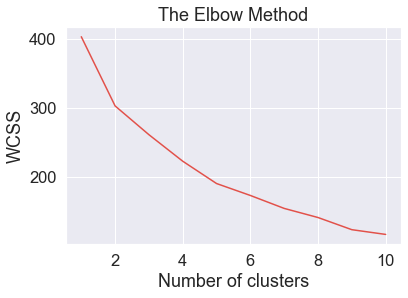

In [115]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [116]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1], dtype=int32)

In [117]:
kmeans.cluster_centers_

array([[ 1.00000000e+00,  4.44089210e-16,  3.83928571e-01,
         1.78571429e-01,  4.37500000e-01,  7.14285714e-01,
         1.69642857e-01,  1.16071429e-01,  1.51785714e-01,
         6.96428571e-01,  1.51785714e-01],
       [-4.44089210e-16,  1.00000000e+00,  3.97727273e-01,
         2.04545455e-01,  3.97727273e-01,  7.95454545e-01,
         7.95454545e-02,  1.25000000e-01,  7.95454545e-02,
         6.70454545e-01,  2.50000000e-01]])

In [118]:
df['Clusters']=kmeans.labels_
df

,CustomerID,Gender,Age,Annual Income,Spending Score,Clusters
0,1,1,1,2,0,1
1,2,1,1,2,1,1
2,3,0,1,2,2,0
3,4,0,1,2,1,0
4,5,0,2,2,0,0
...,...,...,...,...,...,...
195,196,0,2,0,1,0
196,197,0,0,0,0,0
197,198,1,2,0,1,1
198,199,1,2,0,2,1


In [119]:
df['Clusters'].value_counts()

0    112
1     88
Name: Clusters, dtype: int64

In [120]:
df.groupby(['Clusters']).mean()

,CustomerID,Gender,Age,Annual Income,Spending Score
Clusters,,,,,
0,97.562500,0.0,1.053571,0.401786,1.000000
1,104.238636,1.0,1.000000,0.329545,1.170455
